## About Dataset 
(source: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

### Context
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

#### Dataset description
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below
- Booking_ID: unique identifier of each booking
- No of adults: Number of adults
- No of children: Number of Children
- noofweekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- noofweek_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- typeofmeal_plan: Type of meal plan booked by the customer:
- requiredcarparking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- roomtypereserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- Market segment type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- noofprevious_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- noofpreviousbookingsnot_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avgpriceper_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- noofspecial_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.


### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Importing Dataset


I am reading the data into a dataframe named rsv_data for this project.

In [2]:
rsv_data = pd.read_csv('data/Hotel Reservations.csv')
rsv_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Displaying information about the variables:

In [3]:
rsv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Here we can observe that we have both continuous and categorical variables. 

In [4]:
rsv_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
rsv_data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

Since some of the variables have limited values, we will consider them to be categorical. These are, for example number of adults, number of children, arrival year and number of special requests. 



In [6]:
cat_var = ['no_of_adults', 'no_of_children','type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'arrival_year','market_segment_type', 'repeated_guest', 'no_of_special_requests', 'booking_status'] 
num_var = np.setdiff1d(list(rsv_data.columns),cat_var)

There are no missing data (null values) found.

<Axes: >

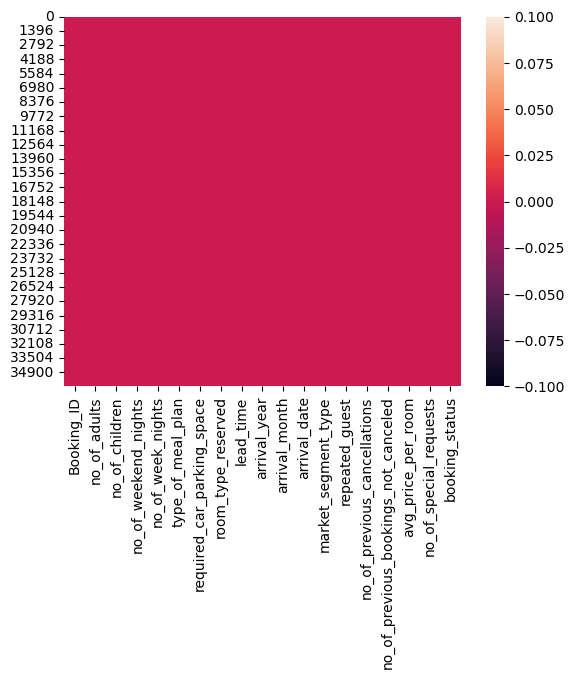

In [7]:
sns.heatmap(data = rsv_data.isnull())

## Exploratory Data Analysis

Checking out correlation between the variables:

C:\Users\andyt\AppData\Local\Temp\ipykernel_19928\3225116707.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=rsv_data.corr(), annot=True, square=True, fmt='.2f', annot_kws={'size': 8})


<Axes: >

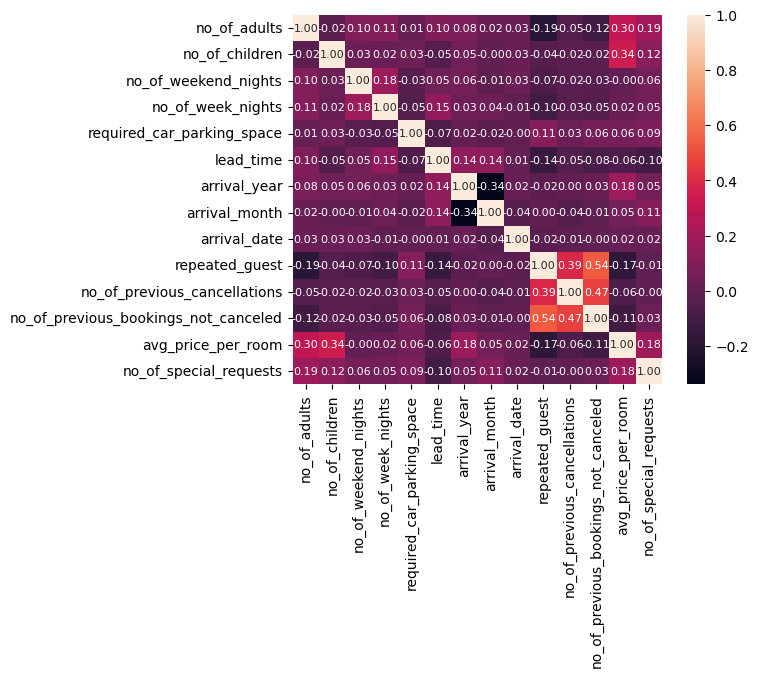

In [8]:
sns.heatmap(data=rsv_data.corr(), annot=True, square=True, fmt='.2f', annot_kws={'size': 8})

From looking at the count plots of the categorical variables, we can observe that:
- Most reservations are made for rooms of 2 adults and no children. 
- The most booked type of meal plan is meal plan 1.
- Most customers who made reservations do not require car parking space.
- Most reserved type of room is room type 1. 
- There are more room reservations in year 2018 than 2017. 
- Most reservations are done online and by new guests (non-repeated guest).
- Most reservations do not have special requests at all.
- The amount of bookings that are not cancelled is roughly two times as many as those that are cancelled. 

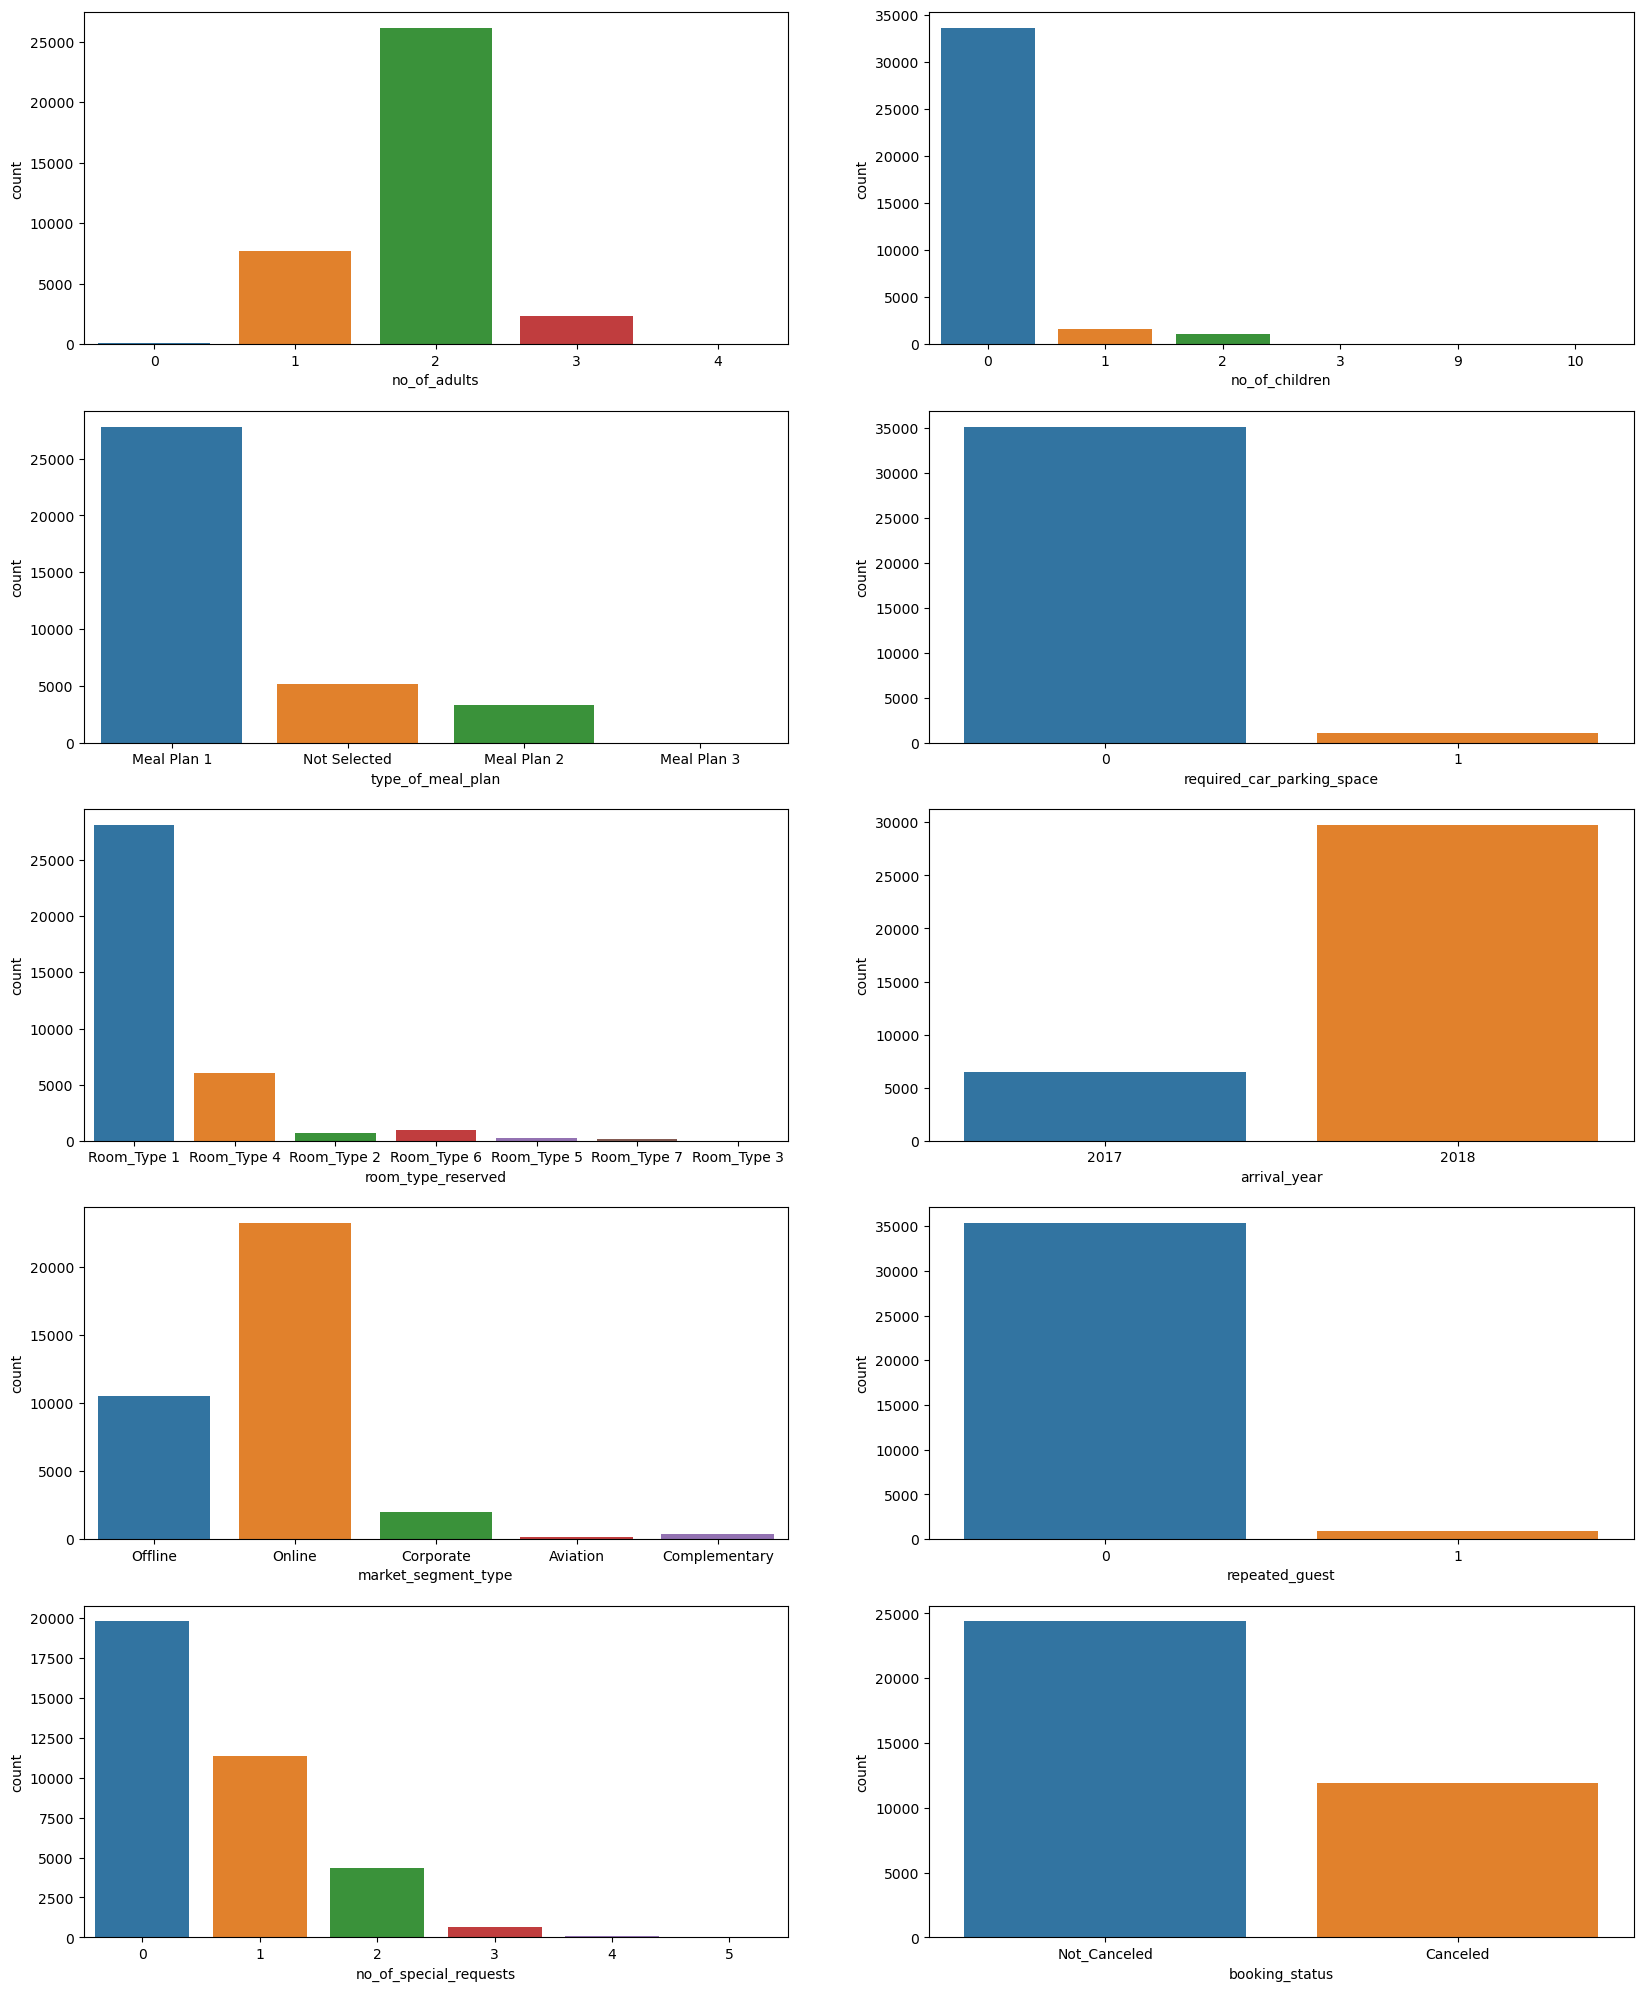

In [30]:
plt.figure(figsize = (20,25))
plt.subplot(5,2,1)
index = 1
for col in cat_var:
    plt.subplot(5,2,index)
    sns.countplot(data=rsv_data, x=col)
    index=index+1

<Axes: ylabel='avg_price_per_room'>

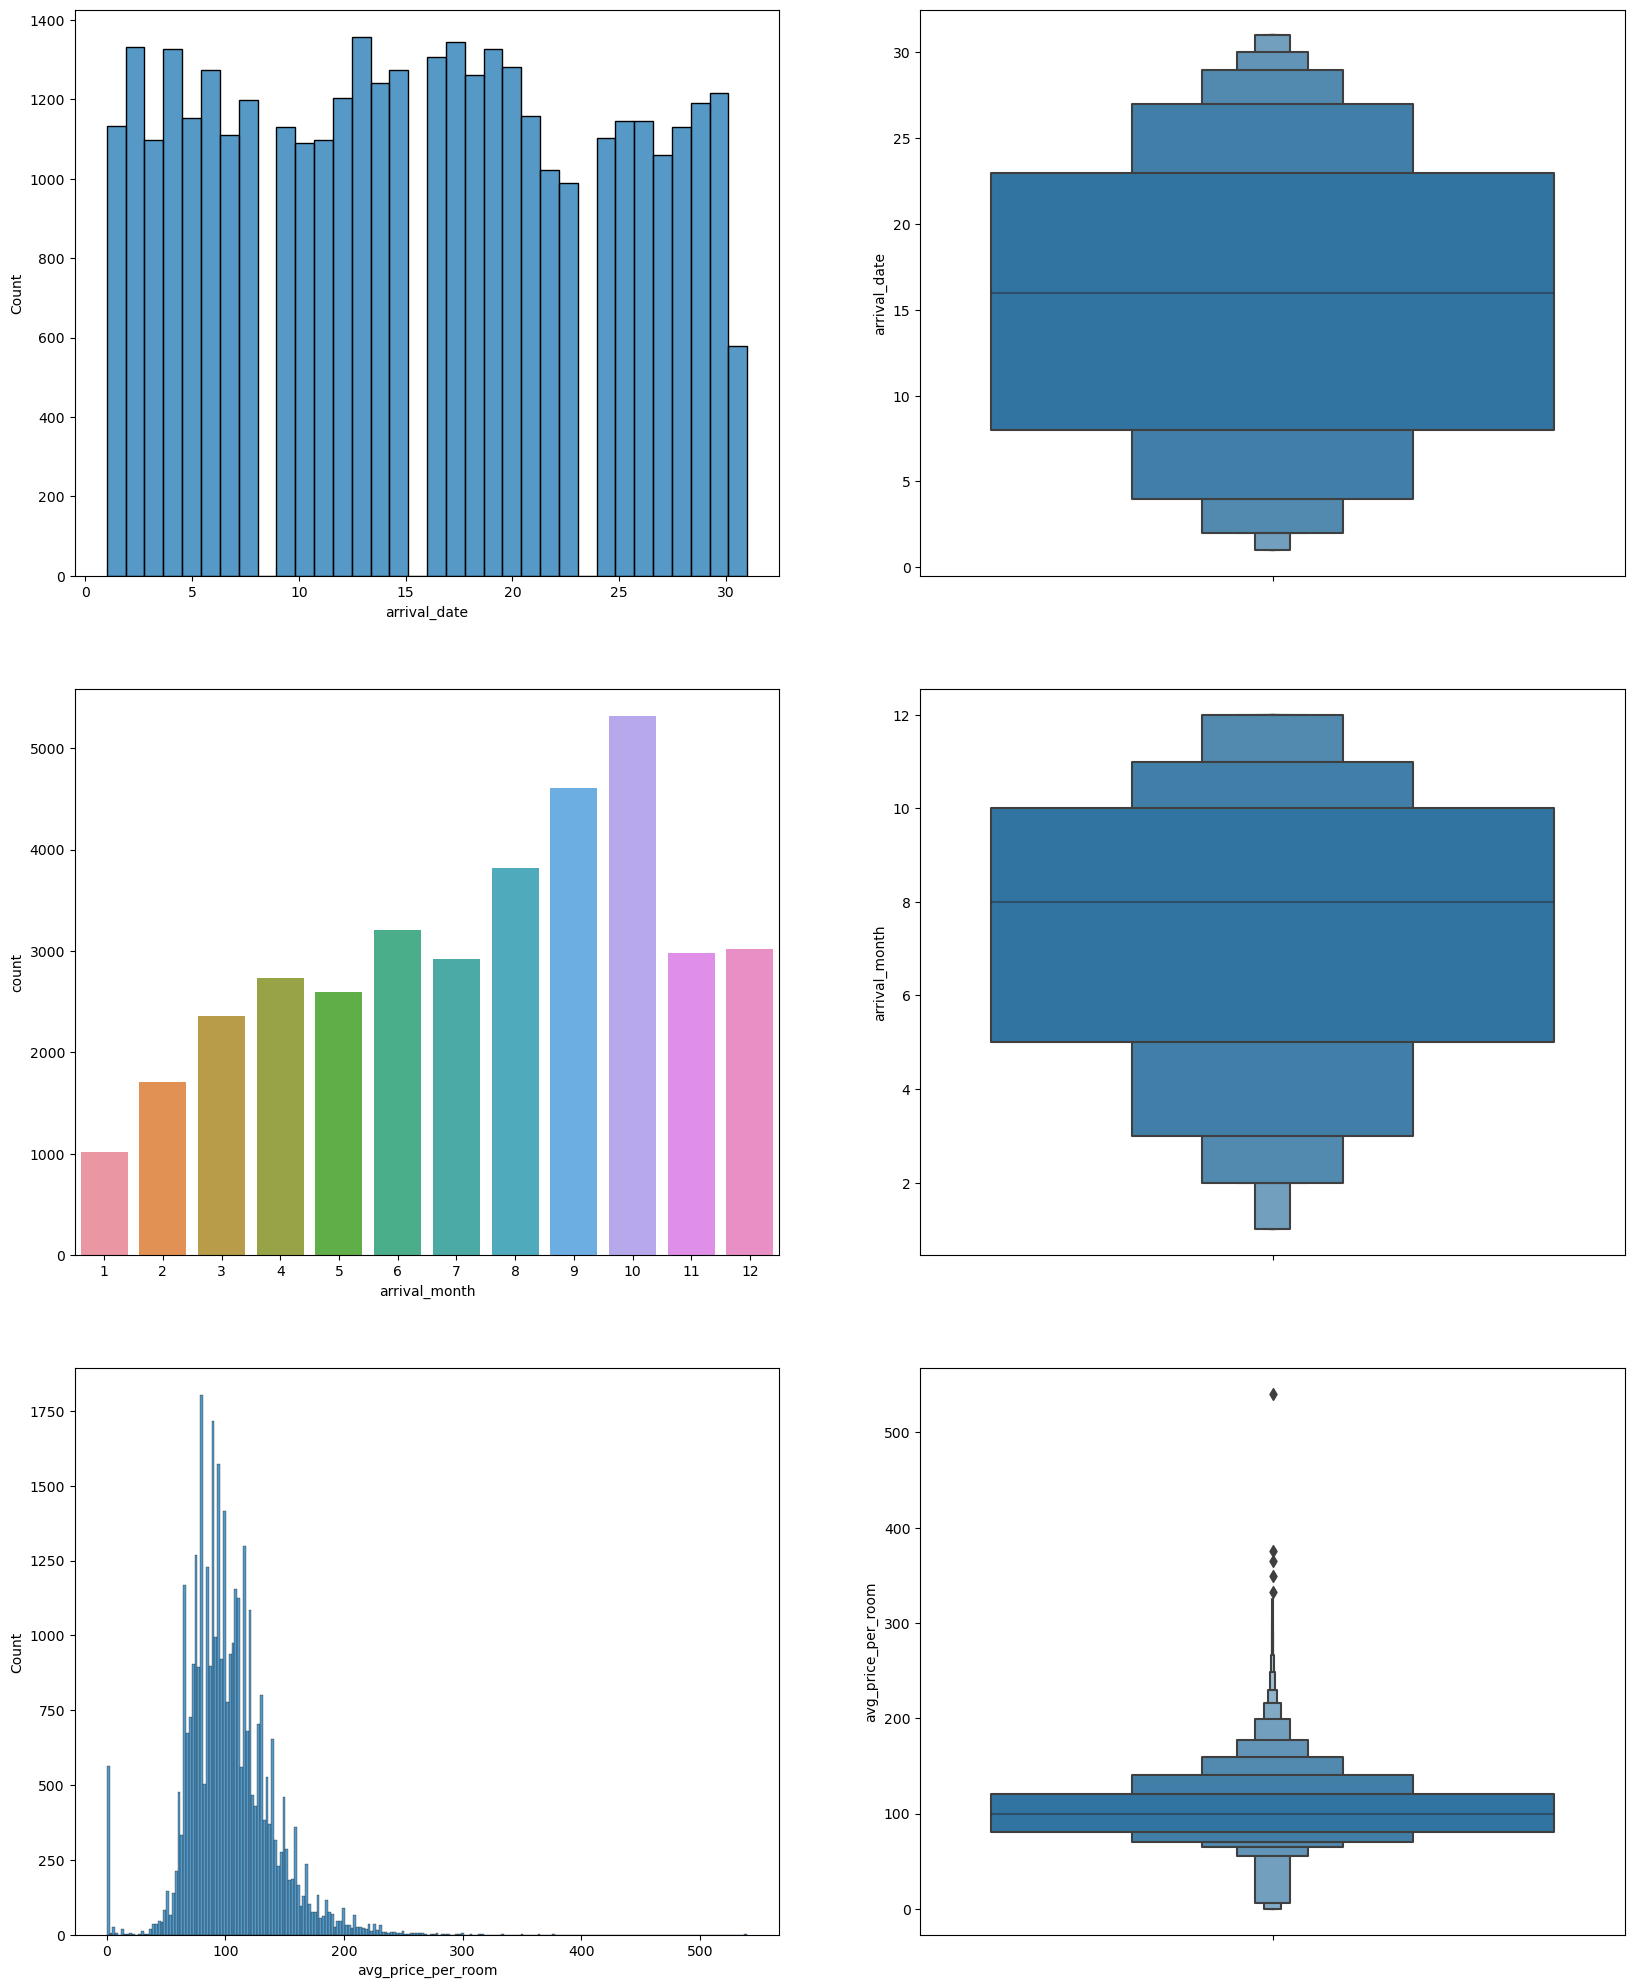

In [29]:
plt.figure(figsize = (20,25))
plt.subplot(3,2,1)
sns.histplot(data=rsv_data, x='arrival_date')
plt.subplot(3,2,2)
sns.boxenplot(data=rsv_data, y='arrival_date', orient='vertical')
plt.subplot(3,2,3)
sns.countplot(data=rsv_data, x='arrival_month')
plt.subplot(3,2,4)
sns.boxenplot(data=rsv_data, y='arrival_month', orient='vertical')
plt.subplot(3,2,5)
sns.histplot(data=rsv_data, x='avg_price_per_room')
plt.subplot(3,2,6)
sns.boxenplot(data=rsv_data, y='avg_price_per_room', orient='vertical')


Understanding the relationship between the variables:
- room type and the price
- number of adults and children and the type of room reserved
- lead time and market segment type
- market segment type and room type vs price
- type of meal plan and room price

<Axes: xlabel='room_type_reserved', ylabel='avg_price_per_room'>

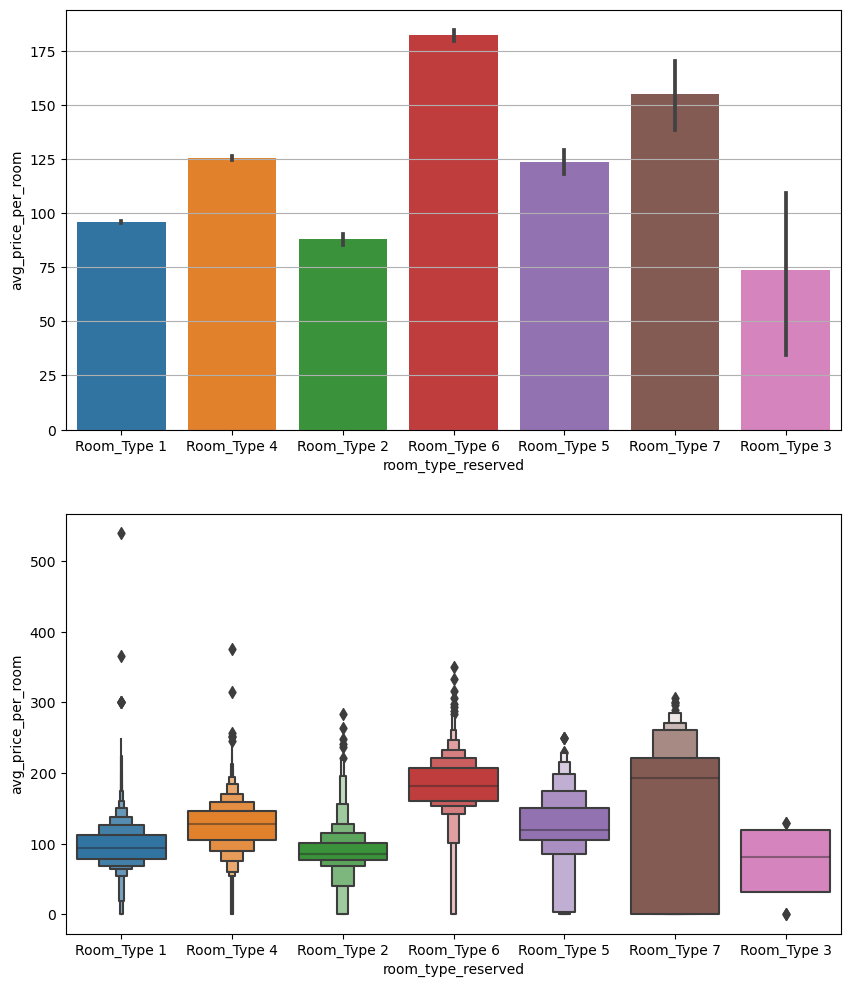

In [11]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
sns.barplot(data=rsv_data, y='avg_price_per_room', x='room_type_reserved')
plt.grid(axis='y')
plt.subplot(2,1,2)
sns.boxenplot(data=rsv_data, y='avg_price_per_room', x='room_type_reserved')

It can be observed that room type 6 has the highest price, while room type 3 is the cheapest one among all. The most reserved room type, which is room type 1 ranks as the third-cheapest room. 

We will be creating a new feature called no_of_adults_and_children, representing the total amount of people in a reservation.

<Axes: xlabel='room_type_reserved', ylabel='no_of_adults_and_children'>

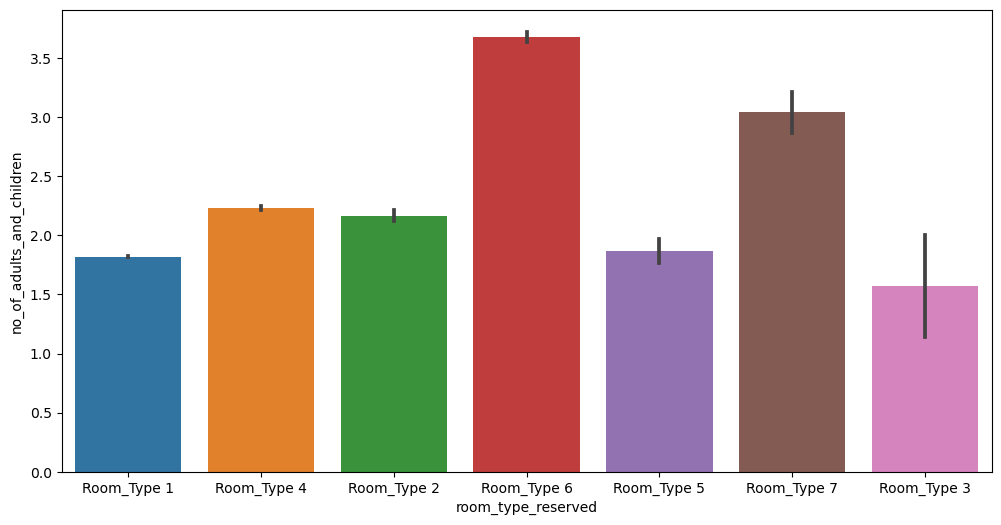

In [24]:
rsv_data['no_of_adults_and_children'] = rsv_data['no_of_adults'] + rsv_data['no_of_children']
plt.figure(figsize=(12,6))
sns.barplot(data=rsv_data, y='no_of_adults_and_children', x='room_type_reserved')

We can assume that room type 6 is greatest in space, hence being able to accommodate the most amount of people, thus explaining its price being the highest among all the room types. 

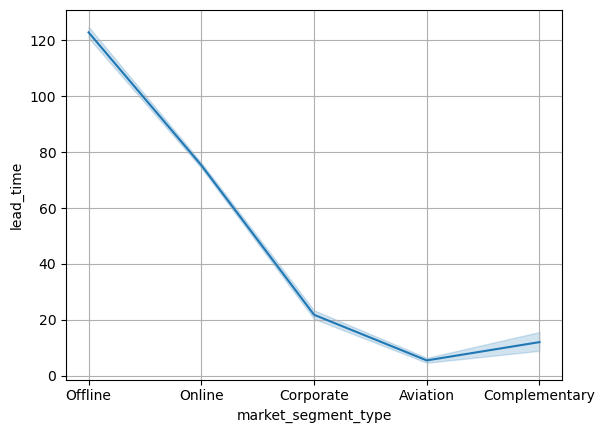

In [27]:
sns.lineplot(data=rsv_data, x='market_segment_type', y='lead_time')
plt.grid()

Bookings made offline has the longest lead time. 

<Axes: xlabel='market_segment_type', ylabel='count'>

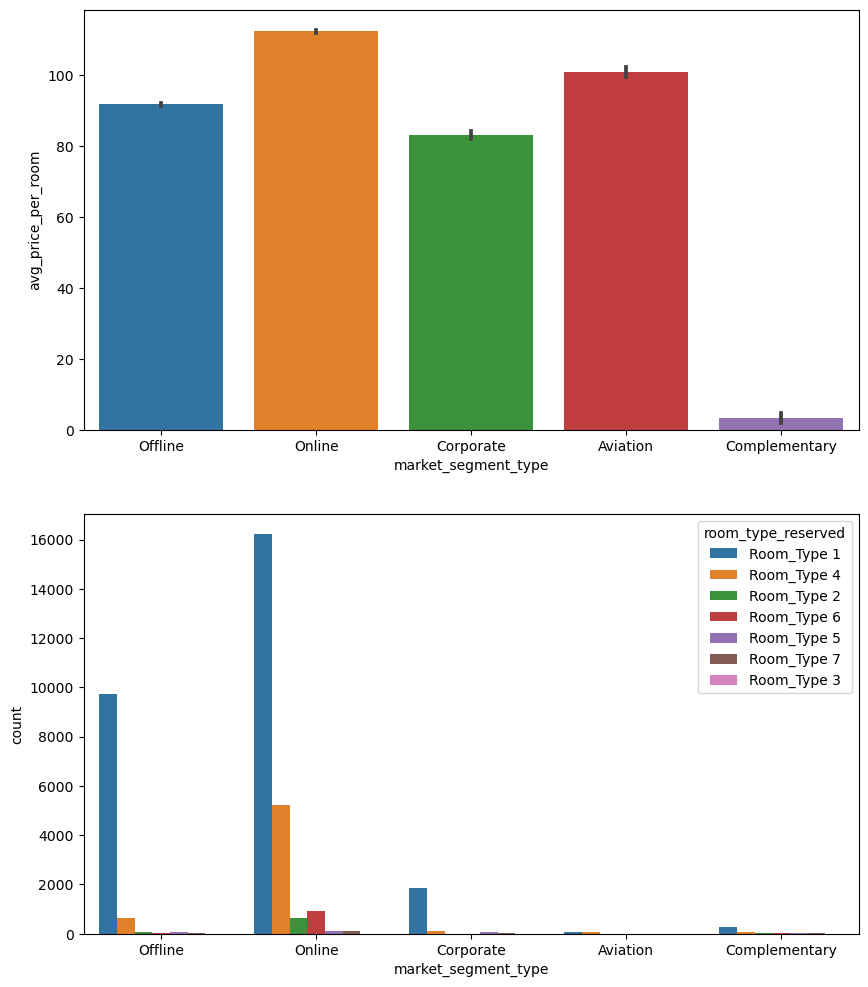

In [42]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
sns.barplot(data=rsv_data, x='market_segment_type', y='avg_price_per_room')
plt.subplot(2,1,2)
sns.countplot(data=rsv_data, hue='room_type_reserved', x='market_segment_type')

- Bookings made online are the priciest, followed by aviation. 
- Room type 1 is the most booked room type online. 

<Axes: xlabel='type_of_meal_plan', ylabel='avg_price_per_room'>

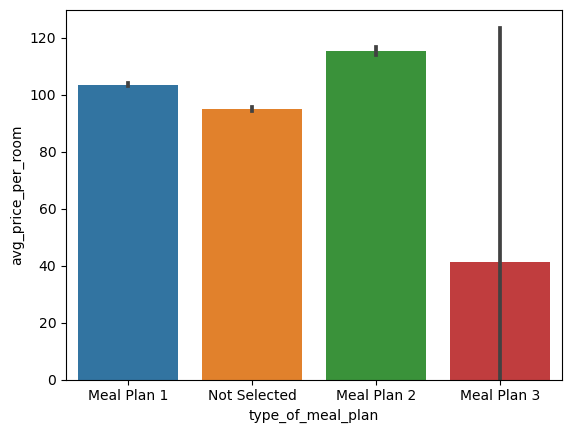

In [43]:
sns.barplot(data=rsv_data, x='type_of_meal_plan', y='avg_price_per_room')

### Bivariate Analysis

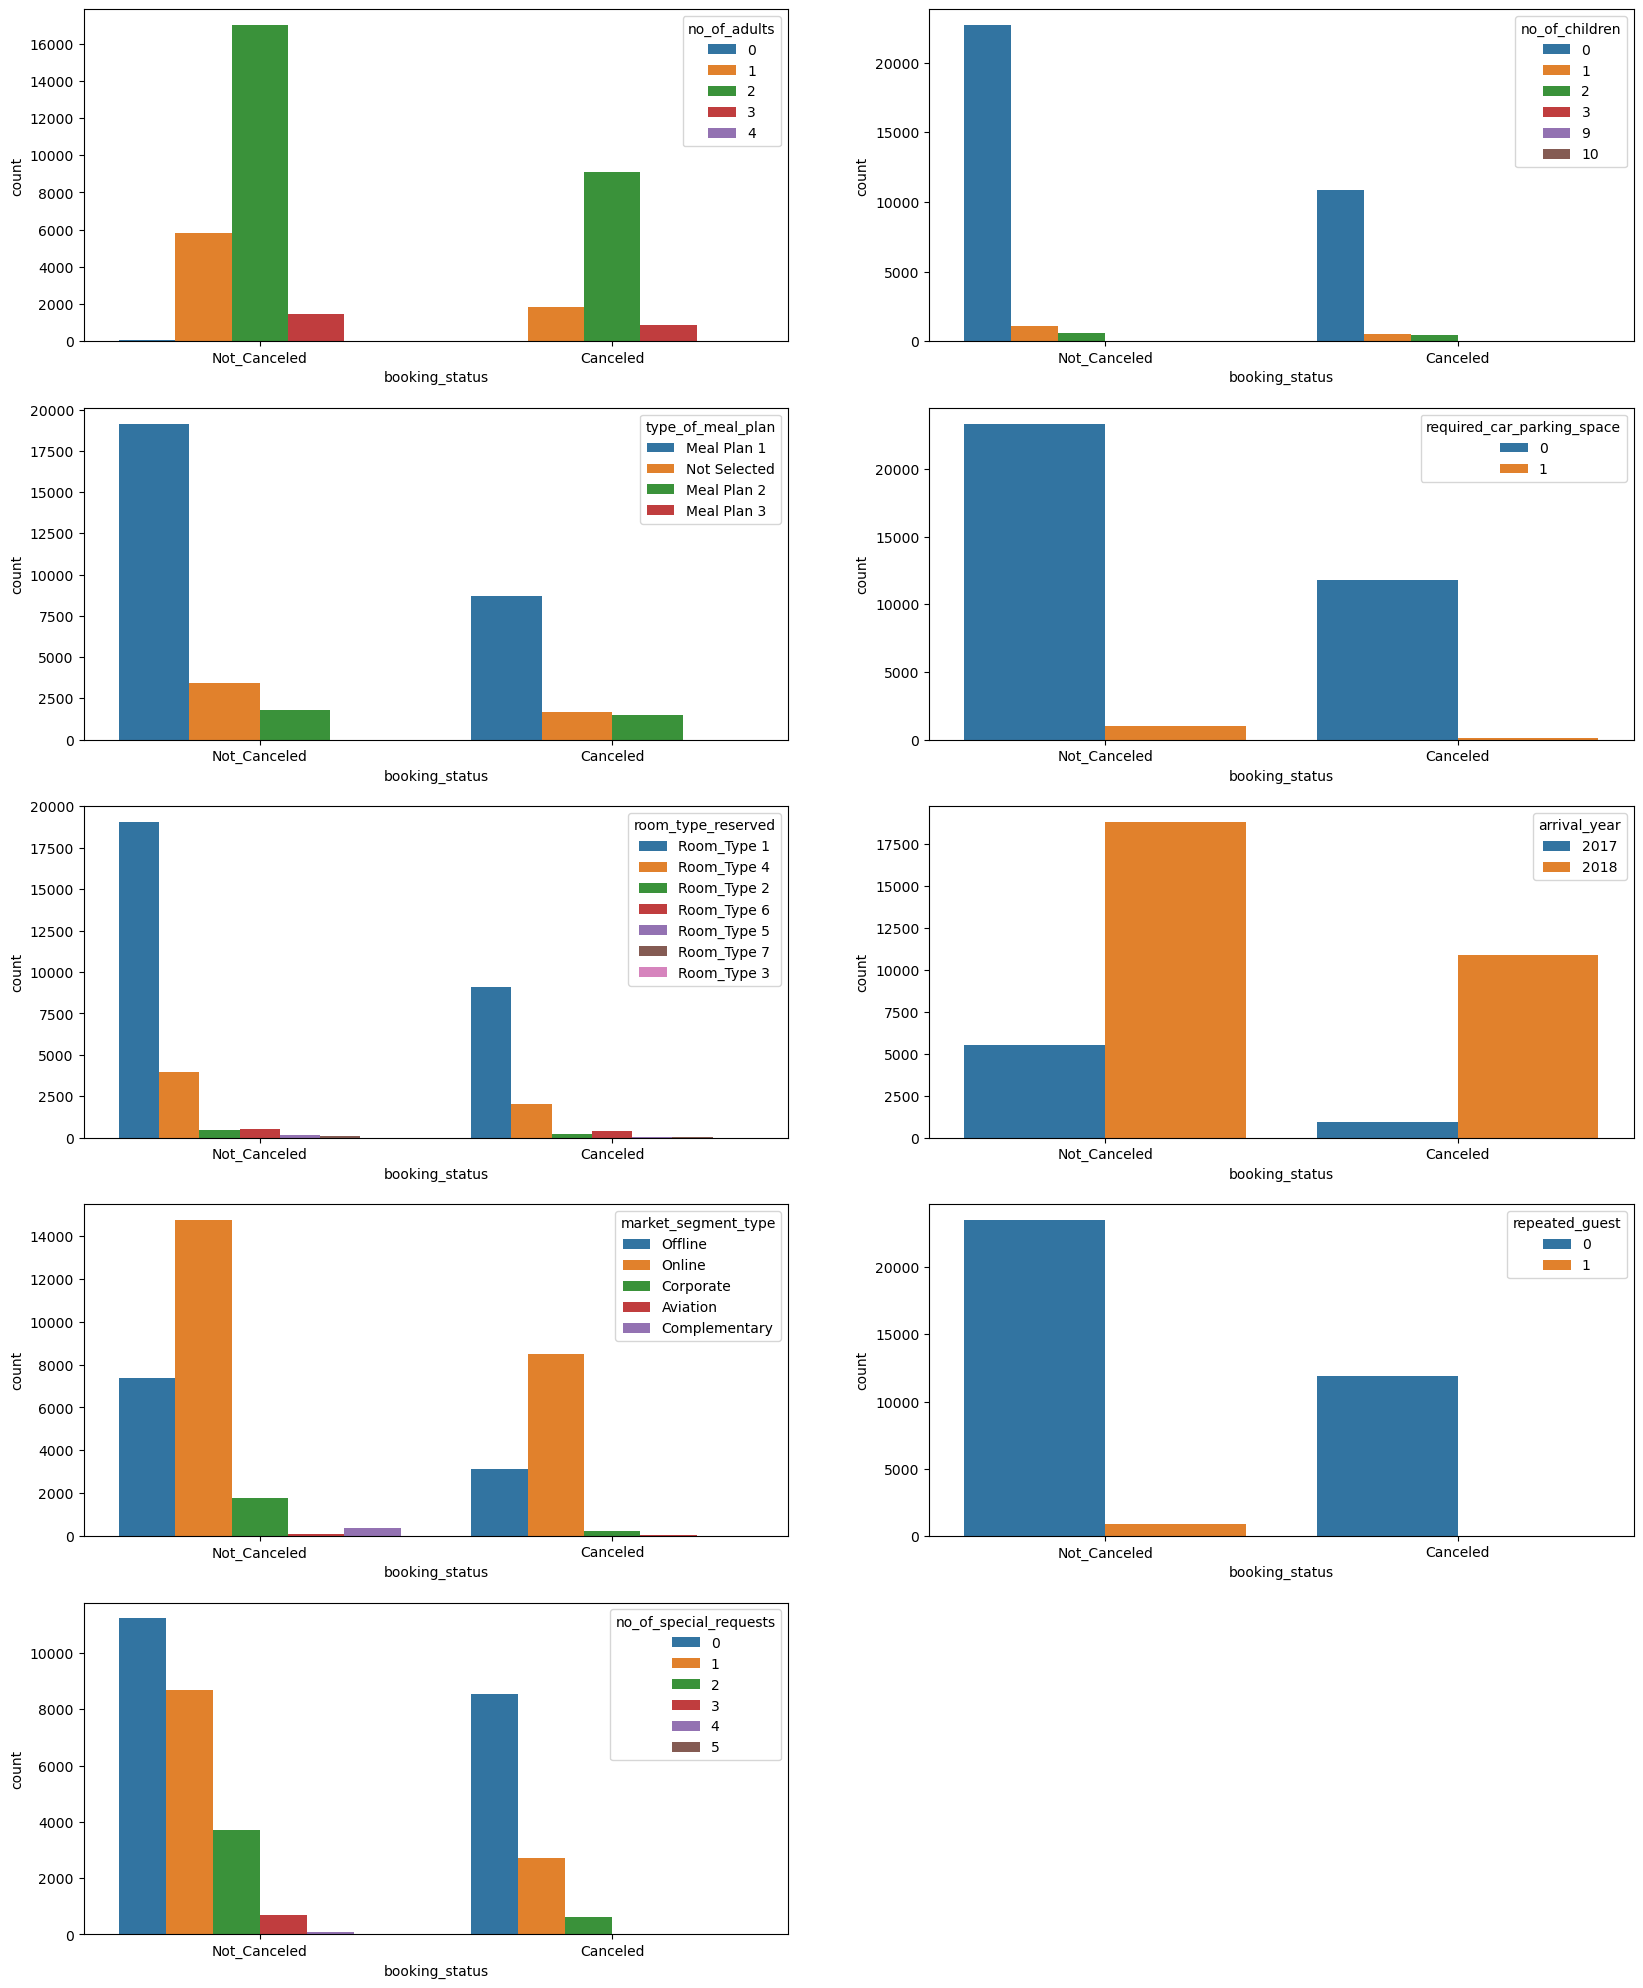

In [51]:
plt.figure(figsize = (20,25))
plt.subplot(5,2,1)
index = 1
for col in cat_var[:-1]:
    plt.subplot(5,2,index)
    sns.countplot(data=rsv_data, x='booking_status', hue=col)
    index=index+1

<Axes: xlabel='lead_time', ylabel='Density'>

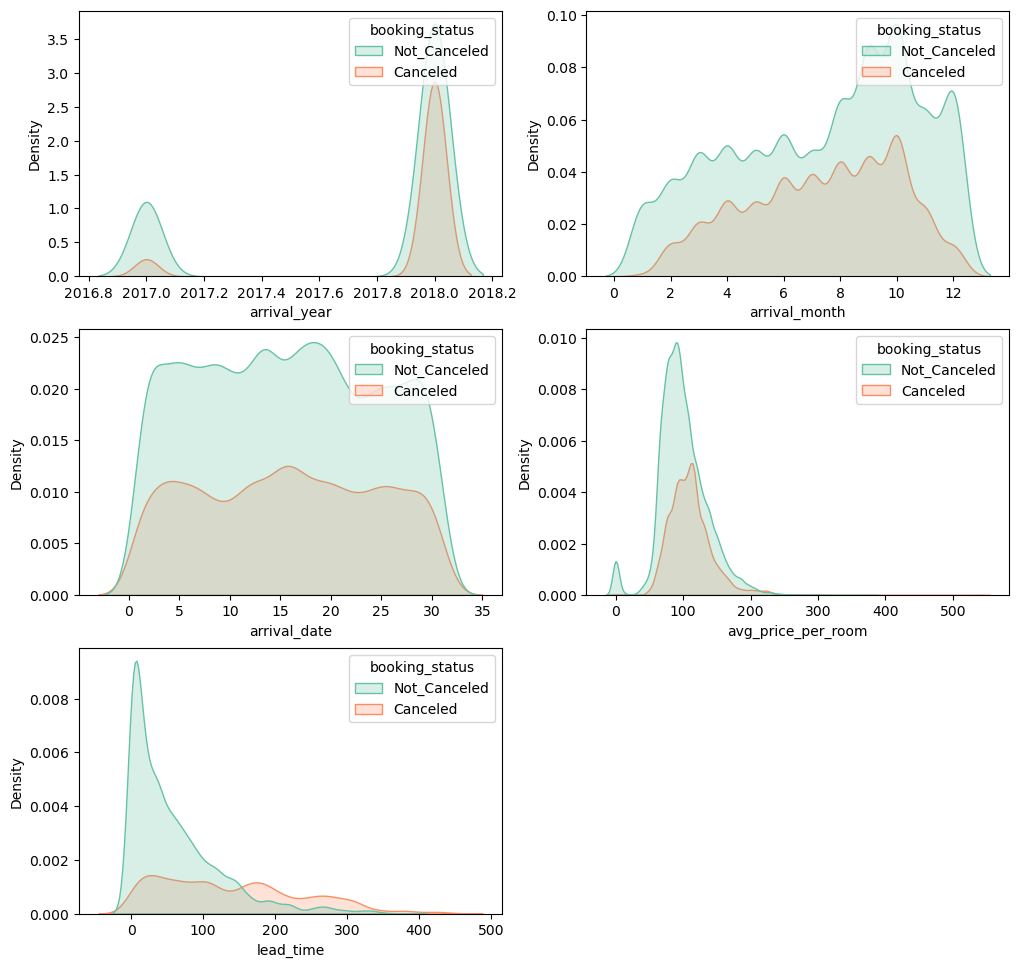

In [66]:
plt.figure(figsize=(12,20))
plt.subplot(5,2,1)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', fill=True, data=rsv_data)

plt.subplot(5,2,2)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', fill=True, data=rsv_data)

plt.subplot(5,2,3)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', fill=True, data=rsv_data)

plt.subplot(5,2,4)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', fill=True, data=rsv_data)

plt.subplot(5,2,5)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', fill=True, data=rsv_data)

Looking at the target variable, we can make assumptions that:
- guests who require a car parking space generally do not cancel their reservations.
- repeated guests rarely cancel their reservation. 
- guests who make special requests are less likely to cancel their reservations. The more requests they make, the less likely they cancel their reservation. 
- Corporate guests rarely cancel their reservations. 
- Guests are less likely to cancel their reservations for the end of the year (October-December)
- Guests are more likely to cancel reservations as the room gets more expensive. 
- Most noticeable is the longer the lead time is, the more likely a guest would cancel his/her reservation. 

 As lead_time shows such great influence in 'booking_status', we are going to do a deeper analysis on it. 